In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

In [4]:
df = pd.read_csv("retail_sales.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
# Check rows and columns
df.shape

# Check column names and data types
df.info()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [6]:
df['Postal Code'] = df['Postal Code'].fillna(0)

In [7]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

In [9]:
df['Shipping_Days'] = (df['Ship Date'] - df['Order Date']).dt.days

In [10]:
df[['Order Date','Ship Date','Shipping_Days']].head()

,Order Date,Ship Date,Shipping_Days
0,2017-11-08,2017-11-11,3
1,2017-11-08,2017-11-11,3
2,2017-06-12,2017-06-16,4
3,2016-10-11,2016-10-18,7
4,2016-10-11,2016-10-18,7


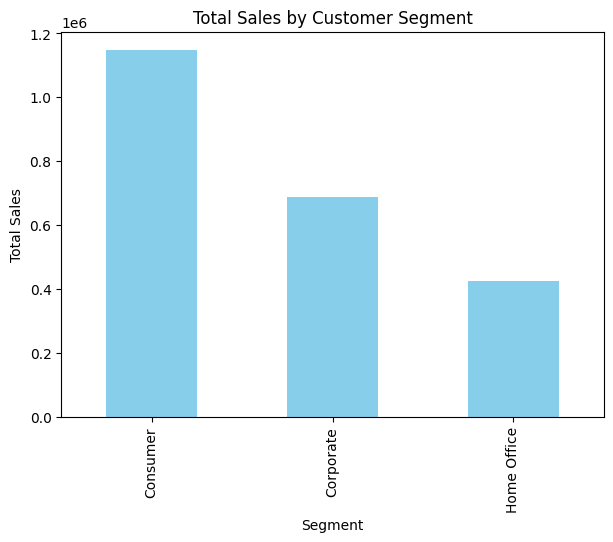

In [11]:
segment_sales = df.groupby('Segment')['Sales'].sum()

plt.figure(figsize=(7,5))
segment_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.show()

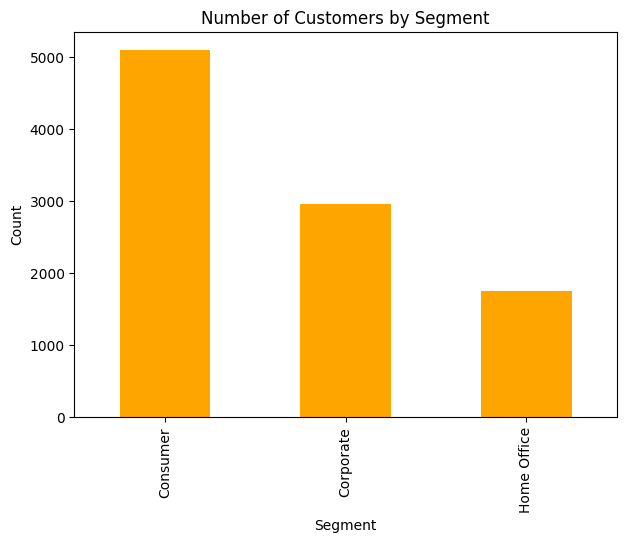

In [12]:
segment_count = df['Segment'].value_counts()

plt.figure(figsize=(7,5))
segment_count.plot(kind='bar', color='orange')
plt.title('Number of Customers by Segment')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()

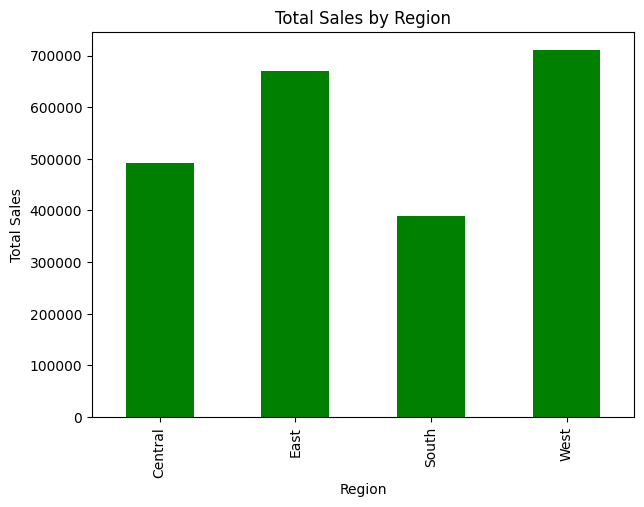

In [13]:
region_sales = df.groupby('Region')['Sales'].sum()

plt.figure(figsize=(7,5))
region_sales.plot(kind='bar', color='green')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

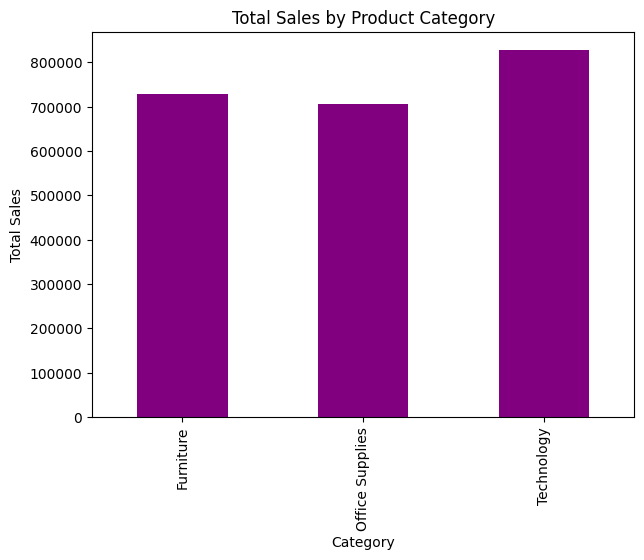

In [14]:
category_sales = df.groupby('Category')['Sales'].sum()

plt.figure(figsize=(7,5))
category_sales.plot(kind='bar', color='purple')
plt.title('Total Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

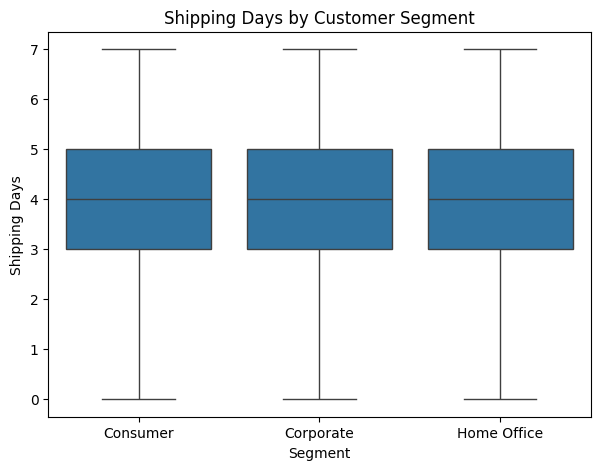

In [15]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Segment', y='Shipping_Days', data=df)
plt.title('Shipping Days by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Shipping Days')
plt.show()

In [16]:
segment_mean = df.groupby('Segment')['Sales'].mean()
print("Average sales per segment:\n", segment_mean)

Average sales per segment:
 Segment
Consumer       225.065777
Corporate      233.150720
Home Office    243.403309
Name: Sales, dtype: float64


In [17]:
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head()
print("\nTop 5 cities by total sales:\n", top_cities)


Top 5 cities by total sales:
 City
New York City    252462.547
Los Angeles      173420.181
Seattle          116106.322
San Francisco    109041.120
Philadelphia     108841.749
Name: Sales, dtype: float64


In [18]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head()
print("\nTop 5 products by sales:\n", top_products)


Top 5 products by sales:
 Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
Name: Sales, dtype: float64


## Conclusion

- **Consumer segment** contributes the highest sales, followed by Corporate and Home Office.  
- **Region-wise sales** show which geographic areas are most profitable.  
- **Category-wise sales** highlight the most popular product types.  
- **Shipping days** are consistent across segments, indicating efficient logistics.  
- **Top cities and products** help in targeting marketing and operational strategies.  

*All analysis is performed for internship learning and project demonstration.*
